In [1]:
from qutip import *
from qutip.measurement import measure, measurement_statistics
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
N=65

In [134]:
#cavity operators
ac = destroy(N)
xc = (ac+ac.dag())/np.sqrt(2)
pc = 1j*(ac.dag()-ac)/np.sqrt(2)
ic = qeye(N)

In [135]:
#qubit operators
aq = destroy(2)
xq = (aq+aq.dag())/np.sqrt(2)
pq = 1j*(aq.dag()-aq)/np.sqrt(2)
hq = (sigmax()+sigmaz())/np.sqrt(2)
iq = qeye(2)

In [372]:
#put qubit in |+> state
psi0 = tensor(basis(2),basis(N))
psi = tensor(hq,ic)*psi0

# Displacement

In [373]:
norm_g = 1
alpha = np.sqrt(2*np.pi)
phase_g = -(np.angle(alpha)+np.pi/2)
g = norm_g*(np.cos(phase_g)+1j*np.sin(phase_g))

H_displace = tensor(iq, g*ac+np.conj(g)*ac.dag())
t = np.abs(alpha)/np.abs(g)

In [374]:
output = mesolve(H_displace, psi, np.linspace(0,t,10), [], [])

In [375]:
fidelity(output.states[-1].ptrace(1),(coherent(N,alpha)))

1.0000116713066558

(<Figure size 800x600 with 1 Axes>,
 <AxesSubplot: xlabel='Fock number', ylabel='Occupation probability'>)

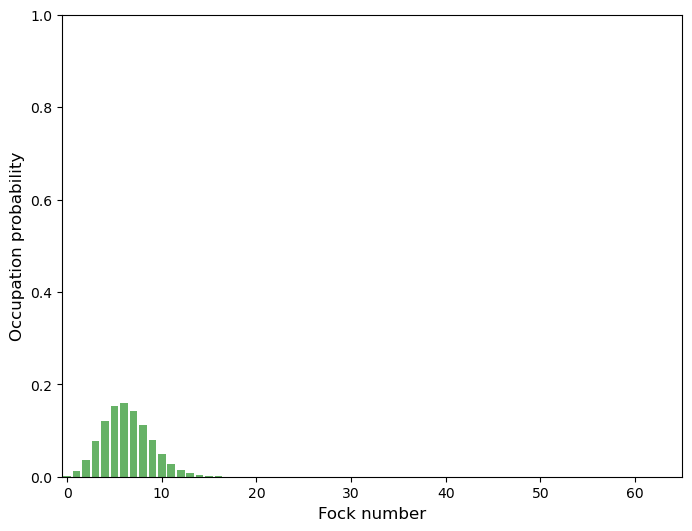

In [145]:
plot_fock_distribution(output.states[-1].ptrace(1))

(<Figure size 800x600 with 1 Axes>,
 <AxesSubplot: xlabel='Fock number', ylabel='Occupation probability'>)

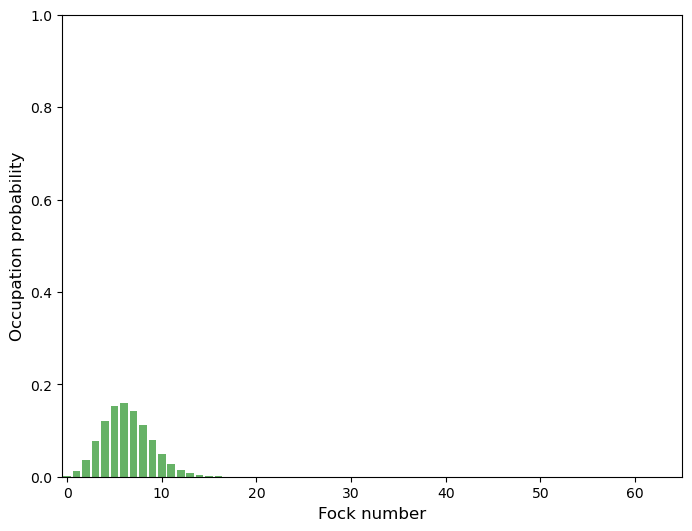

In [150]:
plot_fock_distribution(coherent(N,alpha))

(<Figure size 600x600 with 1 Axes>,
 <AxesSubplot: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

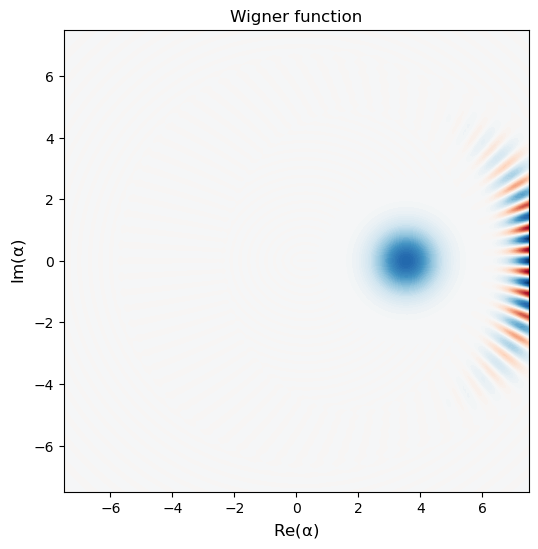

In [197]:
plot_wigner(output.states[-1])

# Controlled displacement

In [380]:
norm_g = 1

alpha1 = np.sqrt(2*np.pi)
phase_g1 = -(np.angle(alpha)+np.pi/2)
g1 = norm_g*(np.cos(phase_g1)+1j*np.sin(phase_g1))

alpha2 = np.sqrt(2*np.pi)
phase_g2 = -(np.angle(alpha2)+np.pi/2)
g2 = norm_g*(np.cos(phase_g2)+1j*np.sin(phase_g2))

t = np.abs(alpha)/np.abs(g)

H_D1 = tensor(sigmaz(), g1*ac+np.conj(g1)*ac.dag())
H_D2 = tensor(qeye(2), g2*ac+np.conj(g2)*ac.dag())
H_cD = H_D1+H_D2

In [381]:
psi = tensor((basis(2)+basis(2,1)).unit(), basis(N))
output2 = mesolve(H_D2, psi, np.linspace(0,t,10), [], [])

In [382]:
fidelity(output2.states[-1].ptrace(1),(coherent(N,alpha)+coherent(N,-alpha)).unit())

0.7071123899461215

In [368]:
fidelity(output2.states[-1].ptrace(1),coherent(N,alpha))

0.7071181724279874

In [369]:
output2.states[1].ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5        0.42814747]
 [0.42814747 0.5       ]]

(<Figure size 800x600 with 1 Axes>,
 <AxesSubplot: xlabel='Fock number', ylabel='Occupation probability'>)

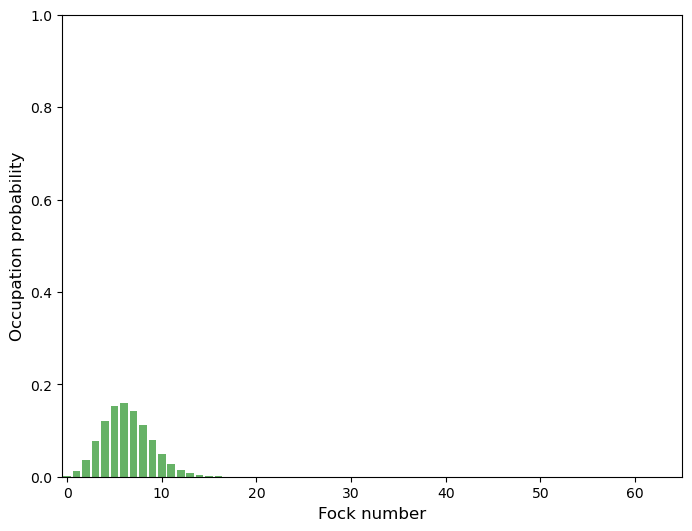

In [364]:
plot_fock_distribution(output2.states[-1].ptrace(1))

(<Figure size 600x600 with 1 Axes>,
 <AxesSubplot: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

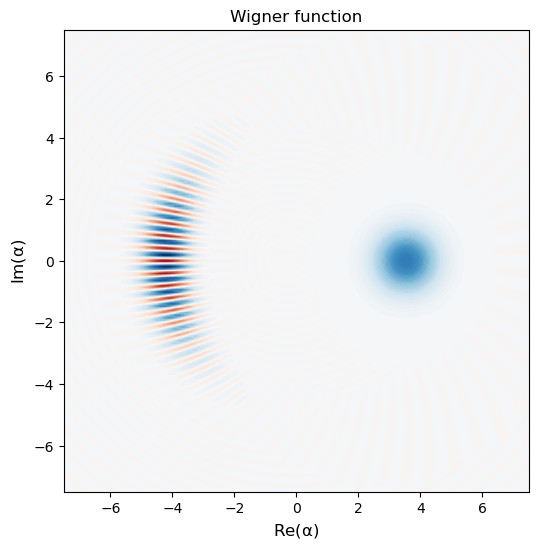

In [365]:
plot_wigner(output2.states[-1])